# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time

# Read and Inspect Data

In [2]:
df = pd.read_csv('Flight_Price_Dataset_Q2.csv')
df

,departure_time,stops,arrival_time,class,duration,days_left,price
0,Evening,zero,Night,Economy,2.17,1,5953
1,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,Morning,zero,Afternoon,Economy,2.25,1,5955
4,Morning,zero,Morning,Economy,2.33,1,5955
...,...,...,...,...,...,...,...
270133,Early_Morning,one,Night,Business,17.25,49,68739
270134,Morning,one,Evening,Business,10.08,49,69265
270135,Afternoon,one,Night,Business,10.42,49,77105
270136,Early_Morning,one,Evening,Business,10.00,49,81585


In [3]:
df['stops'].value_counts()

stops
one            225767
zero            32466
two_or_more     11905
Name: count, dtype: int64

In [4]:
df['departure_time'].value_counts()

departure_time
Morning          64036
Early_Morning    60112
Evening          58586
Night            43267
Afternoon        42951
Late_Night        1186
Name: count, dtype: int64

In [5]:
df['arrival_time'].value_counts()

arrival_time
Night            82413
Evening          70494
Morning          56438
Afternoon        34274
Early_Morning    13889
Late_Night       12630
Name: count, dtype: int64

In [6]:
df['class'].value_counts()

class
Economy     185998
Business     84140
Name: count, dtype: int64

# One-Hot Encoding

### Class

In [7]:
df = pd.get_dummies(df, columns=['class'], drop_first=True)
df

,departure_time,stops,arrival_time,duration,days_left,price,class_Economy
0,Evening,zero,Night,2.17,1,5953,True
1,Early_Morning,zero,Morning,2.33,1,5953,True
2,Early_Morning,zero,Early_Morning,2.17,1,5956,True
3,Morning,zero,Afternoon,2.25,1,5955,True
4,Morning,zero,Morning,2.33,1,5955,True
...,...,...,...,...,...,...,...
270133,Early_Morning,one,Night,17.25,49,68739,False
270134,Morning,one,Evening,10.08,49,69265,False
270135,Afternoon,one,Night,10.42,49,77105,False
270136,Early_Morning,one,Evening,10.00,49,81585,False


# Label Encoding

### Arrival_time and Departure_time

In [8]:
mapping = {'Early_Morning': 0,
           'Morning' : 1,
           'Afternoon' : 2,
           'Evening' : 3,
           'Night': 4,
           'Late_Night': 5}

df['arrival_time_encode'] = df['arrival_time'].map(mapping)
df['departure_time_encode'] = df['departure_time'].map(mapping)
df = df.drop('arrival_time', axis = 1)
df = df.drop('departure_time', axis = 1)

df

,stops,duration,days_left,price,class_Economy,arrival_time_encode,departure_time_encode
0,zero,2.17,1,5953,True,4,3
1,zero,2.33,1,5953,True,1,0
2,zero,2.17,1,5956,True,0,0
3,zero,2.25,1,5955,True,2,1
4,zero,2.33,1,5955,True,1,1
...,...,...,...,...,...,...,...
270133,one,17.25,49,68739,False,4,0
270134,one,10.08,49,69265,False,3,1
270135,one,10.42,49,77105,False,4,2
270136,one,10.00,49,81585,False,3,0


### Stops

In [9]:
mapping = {'zero': 0,
           'one' : 1,
           'two_or_more' : 2}

df['stops_encode'] = df['stops'].map(mapping)
df = df.drop('stops', axis = 1)
df

,duration,days_left,price,class_Economy,arrival_time_encode,departure_time_encode,stops_encode
0,2.17,1,5953,True,4,3,0
1,2.33,1,5953,True,1,0,0
2,2.17,1,5956,True,0,0,0
3,2.25,1,5955,True,2,1,0
4,2.33,1,5955,True,1,1,0
...,...,...,...,...,...,...,...
270133,17.25,49,68739,False,4,0,1
270134,10.08,49,69265,False,3,1,1
270135,10.42,49,77105,False,4,2,1
270136,10.00,49,81585,False,3,0,1


# Feature Correlation 

In [10]:
df.corr()

,duration,days_left,price,class_Economy,arrival_time_encode,departure_time_encode,stops_encode
duration,1.000000,-0.039288,0.204198,-0.138937,-0.124206,0.131420,0.468928
days_left,-0.039288,1.000000,-0.091091,0.012238,0.000499,0.000081,-0.009128
price,0.204198,-0.091091,1.000000,-0.937923,-0.000813,0.019681,0.120344
class_Economy,-0.138937,0.012238,-0.937923,1.000000,0.022188,-0.029657,-0.001790
arrival_time_encode,-0.124206,0.000499,-0.000813,0.022188,1.000000,-0.079846,0.045254
departure_time_encode,0.131420,0.000081,0.019681,-0.029657,-0.079846,1.000000,-0.070057
stops_encode,0.468928,-0.009128,0.120344,-0.001790,0.045254,-0.070057,1.000000


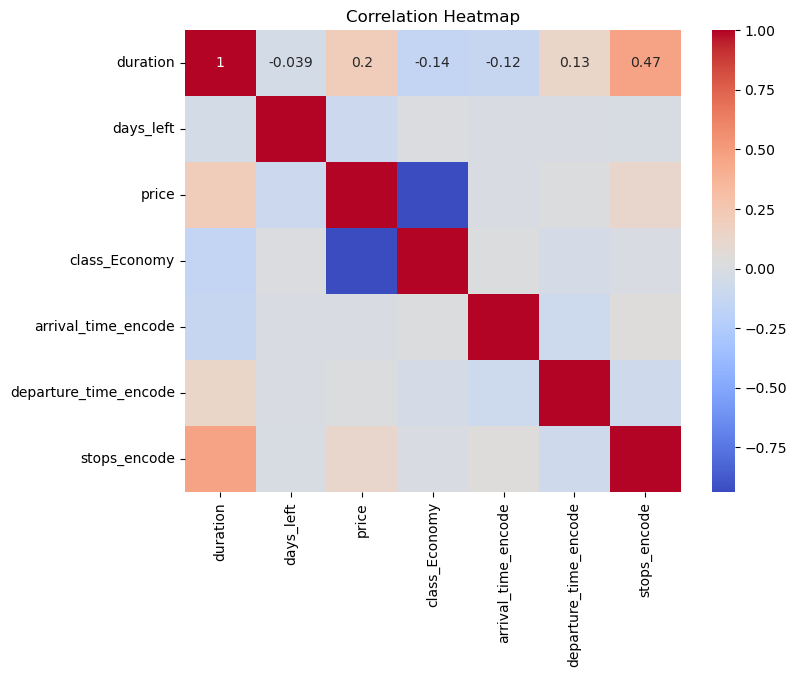

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Define X and y Sets

In [12]:
X_df = df.drop(columns=['price'])
y_df = df['price']

In [13]:
# convert True-False to 1 and 0
X_df['class_Economy'] = X_df['class_Economy'].astype(int)
X_df

,duration,days_left,class_Economy,arrival_time_encode,departure_time_encode,stops_encode
0,2.17,1,1,4,3,0
1,2.33,1,1,1,0,0
2,2.17,1,1,0,0,0
3,2.25,1,1,2,1,0
4,2.33,1,1,1,1,0
...,...,...,...,...,...,...
270133,17.25,49,0,4,0,1
270134,10.08,49,0,3,1,1
270135,10.42,49,0,4,2,1
270136,10.00,49,0,3,0,1


# Split Data to Train and Test Sets

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, shuffle=True)

In [15]:
X = x_train.to_numpy()
y = y_train.to_numpy()
y = y.reshape(-1, 1)

# Data Normalization

In [16]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Prediction and Cost Function

In [17]:
def predict(W, X, b):
    return X @ W + b

$$f_{w,b}(X) = X^TW  + b$$

In [18]:
def cost_function(y_hat, y):
    return np.mean((y_hat - y)**2) / 2

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 


# Model Definition

In [19]:
def gradient_descent(X, y, W, b, alpha):
    n = X.shape[1]
    m = X.shape[0]
    
    error = predict(W, X, b) - y
    dW = X.T @ error / X.shape[0]
    db = np.mean(error)
    
    W -= alpha * dW
    b -= alpha * db
    
    return W, b, error



$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
$$


$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

In [20]:
def model(X, y, max_itr = 1000, convergence_threshold = 0.0001):
    start = time.time()
    
    n = X.shape[1]
    W = np.random.rand(n, 1)
    b = 0
    alpha = 0.01
    cost_history = np.zeros(max_itr)
    itr = 0
    
    for i in range(max_itr):
        W, b, error = gradient_descent(X, y, W, b, alpha)
        cost_history[i] = np.mean(error**2)
        itr += 1
        
        if (i + 1) % 20 == 0:
            print(f"Cost Function on Iteration {i + 1} = {cost_history[i]}")
            
        if i > 0 and cost_history[i - 1] - cost_history[i] < convergence_threshold:
            break
            
    end = time.time()

    return W, b, cost_history, itr, end - start

# Use Model

In [21]:
W, b, cost_history, itr, ex_time = model(X, y, 400)

Cost Function on Iteration 20 = 661606543.7059146
Cost Function on Iteration 40 = 457348920.98828834
Cost Function on Iteration 60 = 322236283.7292506
Cost Function on Iteration 80 = 232576479.6458685
Cost Function on Iteration 100 = 172910487.14110562
Cost Function on Iteration 120 = 133103085.24248475
Cost Function on Iteration 140 = 106482002.49155548
Cost Function on Iteration 160 = 88639115.66425493
Cost Function on Iteration 180 = 76653239.44712952
Cost Function on Iteration 200 = 68583440.5521775
Cost Function on Iteration 220 = 63137124.12977077
Cost Function on Iteration 240 = 59451708.26277161
Cost Function on Iteration 260 = 56950506.16681441
Cost Function on Iteration 280 = 55247306.28438428
Cost Function on Iteration 300 = 54083032.545408465
Cost Function on Iteration 320 = 53283606.88264794
Cost Function on Iteration 340 = 52731863.59750223
Cost Function on Iteration 360 = 52348798.63120594
Cost Function on Iteration 380 = 52081032.672683924
Cost Function on Iteration 400

# Metrics

In [22]:
y_pred = predict(W, x_test, b)

In [23]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9006741040430452
MAE: 4591.022105125186
MSE: 50955125.80254985
RMSE: 7138.2859148782945


In [24]:
y_pred = predict(W, X, b)

In [25]:
print('R^2:',metrics.r2_score(y, y_pred))
print('MAE:',metrics.mean_absolute_error(y, y_pred))
print('MSE:',metrics.mean_squared_error(y, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y, y_pred)))

R^2: 0.8993881668949277
MAE: 4623.264656184306
MSE: 51884586.00185129
RMSE: 7203.095584667143


# Plot

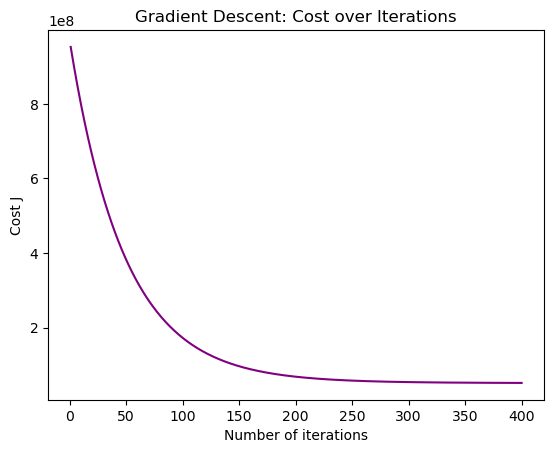

In [26]:
plt.plot(range(1, len(cost_history) + 1), cost_history, color='purple')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Gradient Descent: Cost over Iterations')
plt.show()

# Result

In [27]:
print("PRICE ="
      f"\n{W[0][0]} * {X_df.columns[0]} +", 
      f"\n{W[1][0]} * {X_df.columns[1]} +",
      f"\n{W[2][0]} * {X_df.columns[2]} +",
      f"\n{W[3][0]} * {X_df.columns[3]} +",
      f"\n{W[4][0]} * {X_df.columns[4]} +",
      f"\n{W[5][0]} * {X_df.columns[5]} +",
      f"\n{b}")

PRICE =
1045.9176032714022 * duration + 
-1730.5663874902416 * days_left + 
-20725.651493418718 * class_Economy + 
473.4334578379959 * arrival_time_encode + 
-128.52906791756075 * departure_time_encode + 
2013.89835169293 * stops_encode + 
20530.246491647755


In [28]:
print(f"Training Time: = {ex_time}s")

Training Time: = 1.9529471397399902s


In [29]:
print("Logs", f"MSE = {metrics.mean_squared_error(y, y_pred)}",
              f"RMSE = {np.sqrt(metrics.mean_squared_error(y, y_pred))}",
              f"MAE = {metrics.mean_absolute_error(y, y_pred)}",
              f"R2 = {metrics.r2_score(y, y_pred)}", sep = "\n")

Logs
MSE = 51884586.00185129
RMSE = 7203.095584667143
MAE = 4623.264656184306
R2 = 0.8993881668949277
